In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [144]:
from sklearn.neighbors import KNeighborsRegressor

In [145]:
from sklearn.svm import SVR

In [146]:
df=pd.read_csv(r'C:\Data Science\ML\cognitive\human_cognitive_performance.csv')

In [147]:
df

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,U79996,55,Male,7.8,9,Non-Vegetarian,9.4,Low,157,312.34,55,50.80,46.49
79996,U79997,35,Female,9.8,6,Vegetarian,6.5,Medium,130,290.17,86,94.89,92.41
79997,U79998,32,Female,7.3,10,Non-Vegetarian,7.5,Low,462,249.57,72,63.51,67.35
79998,U79999,34,Male,8.7,8,Vegetarian,7.2,Medium,96,319.48,82,81.43,77.95


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [149]:
#check duplicates
df.duplicated().sum()

0

In [150]:
#checking for null values
df.isna().sum()

User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

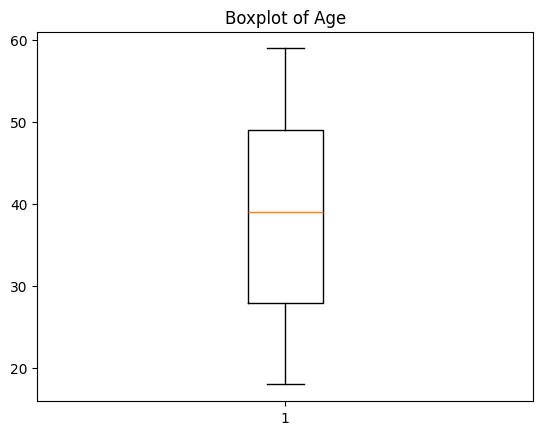

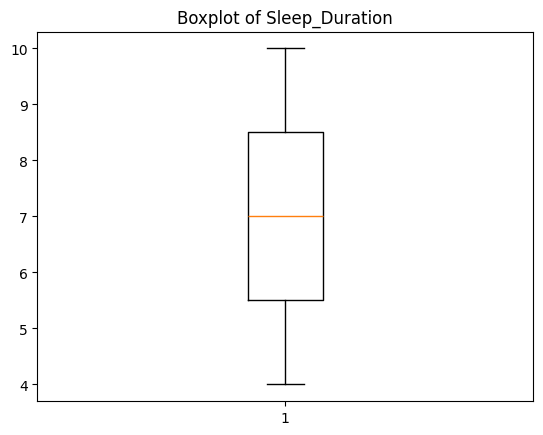

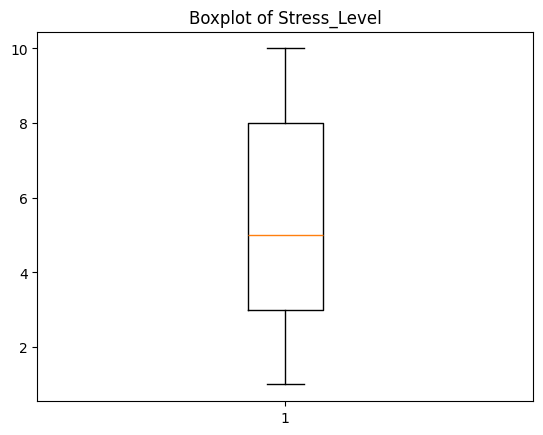

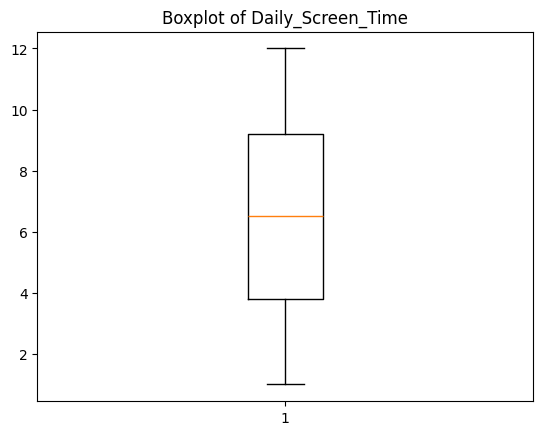

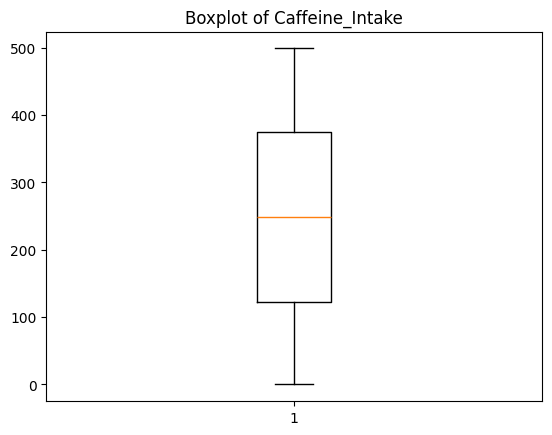

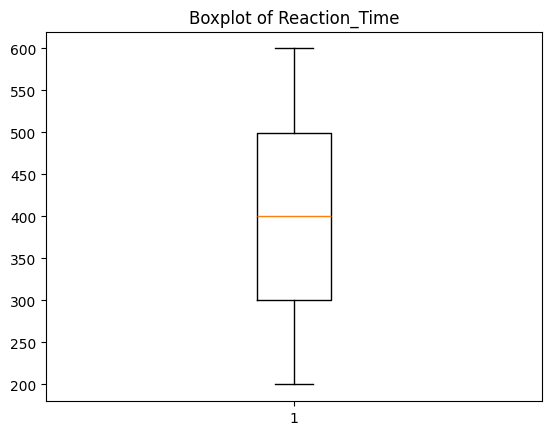

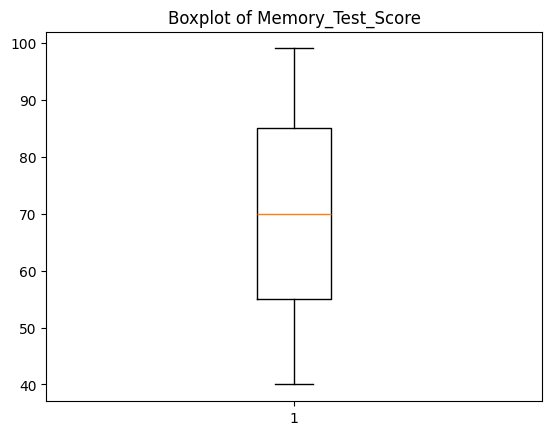

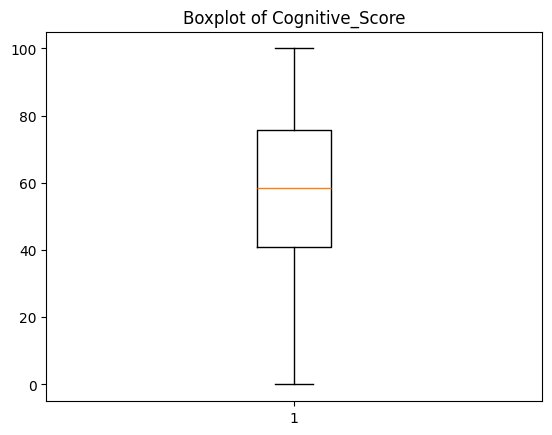

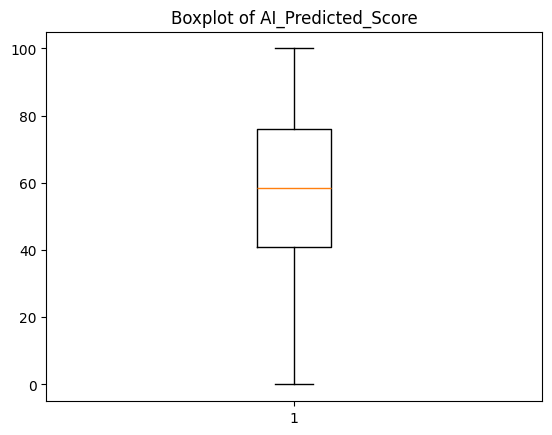

In [151]:
#checking for outliers
for i in df:
    if df[i].dtype=="int64" or df[i].dtype=="float64":
        plt.boxplot(df[i])
        plt.title(f"Boxplot of {i}")
        plt.show()

In [152]:
#outlier detection 

<Axes: title={'center': 'correlation matrix'}>

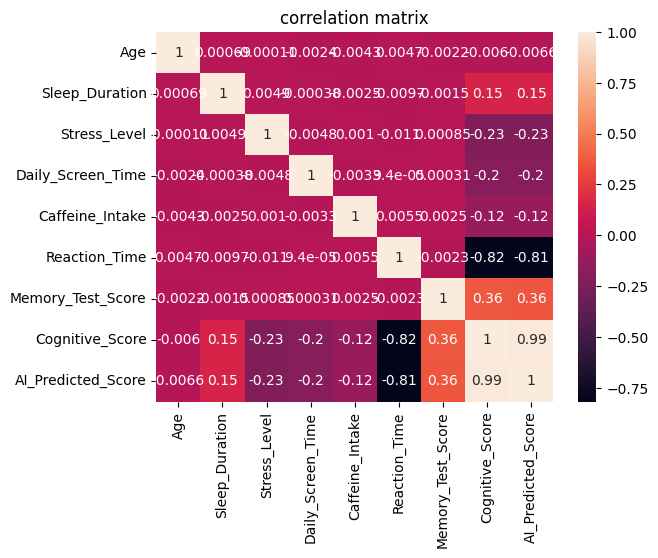

In [153]:
#to check correlation
plt.title('correlation matrix')
plt.Figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [154]:
#know more about the data
df.nunique()

User_ID               80000
Age                      42
Gender                    3
Sleep_Duration           61
Stress_Level             10
Diet_Type                 3
Daily_Screen_Time       111
Exercise_Frequency        3
Caffeine_Intake         500
Reaction_Time         34595
Memory_Test_Score        60
Cognitive_Score        9492
AI_Predicted_Score     9541
dtype: int64

In [155]:
df['Gender'].value_counts()

Gender
Female    38404
Male      38322
Other      3274
Name: count, dtype: int64

In [156]:
df['Age'].max()
df['Age'].min()

18

In [157]:
 #['Reaction_Time'].max() 599.99  ['Memory_Test_Score'].max() 99   ['Memory_Test_Score'].min() 40

#['Reaction_Time'].min() 200 
df['Sleep_Duration'].min()

4.0

In [158]:
#df['Cognitive_Score'].max() 100
#df['Cognitive_Score'].min() 0
a=df['Cognitive_Score'].unique()
print(sorted(a))

[0.0, 0.04, 0.07, 0.08, 0.09, 0.11, 0.12, 0.14, 0.17, 0.22, 0.23, 0.24, 0.25, 0.26, 0.33, 0.34, 0.38, 0.41, 0.43, 0.47, 0.51, 0.59, 0.6, 0.72, 0.73, 0.76, 0.84, 0.86, 0.87, 0.9, 0.91, 0.92, 0.99, 1.0, 1.02, 1.04, 1.09, 1.1, 1.11, 1.14, 1.17, 1.18, 1.19, 1.2, 1.29, 1.33, 1.38, 1.43, 1.47, 1.49, 1.53, 1.56, 1.59, 1.6, 1.61, 1.63, 1.67, 1.68, 1.71, 1.73, 1.74, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.87, 1.92, 1.93, 1.94, 1.97, 1.99, 2.02, 2.06, 2.09, 2.1, 2.11, 2.14, 2.17, 2.19, 2.2, 2.22, 2.25, 2.29, 2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.41, 2.45, 2.49, 2.51, 2.53, 2.54, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.7, 2.72, 2.74, 2.75, 2.8, 2.81, 2.82, 2.85, 2.87, 2.91, 2.92, 2.93, 2.95, 2.98, 3.01, 3.02, 3.05, 3.06, 3.07, 3.08, 3.09, 3.11, 3.13, 3.17, 3.19, 3.2, 3.21, 3.28, 3.29, 3.3, 3.35, 3.36, 3.4, 3.41, 3.48, 3.5, 3.54, 3.55, 3.56, 3.57, 3.59, 3.6, 3.61, 3.63, 3.65, 3.72, 3.73, 3.74, 3.75, 3.77, 3.78, 3.8, 3.85, 3.88, 3.91, 3.93, 3.95, 3.98, 4.0, 4.01, 4.02, 4.03, 4.06, 4.07,

In [159]:
#removing column wich is not relevant
df=df.drop(columns='User_ID')

In [160]:
df['Sleep_Duration'].value_counts()

Sleep_Duration
9.9     1410
4.4     1408
6.8     1407
7.9     1407
5.4     1394
        ... 
4.8     1263
4.9     1259
5.6     1246
4.0      678
10.0     669
Name: count, Length: 61, dtype: int64

In [161]:
#converting continuous numerical data to categorical column
def sleep_duration(Sleep_Duration):
    if Sleep_Duration<5:
        return 'Sleep Depreviation'
    elif Sleep_Duration>=5 and Sleep_Duration<=8:
        return 'Reccomended Sleep'
    else:
        return 'Long Sleep'

In [162]:
df['Sleep_Duration']=df['Sleep_Duration'].apply(sleep_duration) 


In [163]:
def Caffeine_In_mg_per_day(Caffeine_Intake):
    if Caffeine_Intake<400:
        return 'Moderate'
    else:
        return 'High'

In [164]:
df['Caffeine_Intake']=df['Caffeine_Intake'].apply(Caffeine_In_mg_per_day)

In [165]:
df

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,57,Female,Reccomended Sleep,3,Non-Vegetarian,6.5,Medium,Moderate,583.33,65,36.71,39.77
1,39,Female,Reccomended Sleep,9,Non-Vegetarian,10.8,High,Moderate,368.24,58,54.35,57.68
2,26,Male,Long Sleep,6,Vegetarian,5.7,Low,High,445.21,49,32.57,29.54
3,32,Male,Reccomended Sleep,9,Vegetarian,8.3,Low,High,286.33,94,70.15,74.59
4,50,Male,Long Sleep,2,Non-Vegetarian,11.3,Medium,Moderate,237.65,62,87.54,91.78
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,55,Male,Reccomended Sleep,9,Non-Vegetarian,9.4,Low,Moderate,312.34,55,50.80,46.49
79996,35,Female,Long Sleep,6,Vegetarian,6.5,Medium,Moderate,290.17,86,94.89,92.41
79997,32,Female,Reccomended Sleep,10,Non-Vegetarian,7.5,Low,High,249.57,72,63.51,67.35
79998,34,Male,Long Sleep,8,Vegetarian,7.2,Medium,Moderate,319.48,82,81.43,77.95


In [166]:
df.columns

Index(['Age', 'Gender', 'Sleep_Duration', 'Stress_Level', 'Diet_Type',
       'Daily_Screen_Time', 'Exercise_Frequency', 'Caffeine_Intake',
       'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Score',
       'AI_Predicted_Score'],
      dtype='object')

In [167]:
for i in df:
    if df[i].dtype=="object":
        print(df[i].value_counts())

Gender
Female    38404
Male      38322
Other      3274
Name: count, dtype: int64
Sleep_Duration
Reccomended Sleep     41490
Long Sleep            25930
Sleep Depreviation    12580
Name: count, dtype: int64
Diet_Type
Non-Vegetarian    47986
Vegetarian        24136
Vegan              7878
Name: count, dtype: int64
Exercise_Frequency
Medium    31990
Low       31896
High      16114
Name: count, dtype: int64
Caffeine_Intake
Moderate    64004
High        15996
Name: count, dtype: int64


ENCODING

In [168]:
#ordinal encoding
#Encoding- excercise frequency

ordinalExc=OrdinalEncoder(categories=[['Low','Medium',"High"]])
df['Exercise_Frequency']=ordinalExc.fit_transform(df[['Exercise_Frequency']])

In [169]:
#Encoding Sleep duration

ordinalsleep=OrdinalEncoder(categories=[['Reccomended Sleep','Long Sleep','Sleep Depreviation']])
df['Sleep_Duration']=ordinalsleep.fit_transform(df[['Sleep_Duration']])

In [170]:
#onehot encoding gender
onehot1=OneHotEncoder(sparse_output=False,drop='first')
resG=onehot1.fit_transform(df[["Gender"]])

In [171]:
df.drop(columns=['Gender'],inplace=True)

In [172]:
resG=pd.DataFrame(resG,columns=onehot1.get_feature_names_out())

In [173]:
df=df.join(resG)

In [174]:
#onehot encoding diet type
onehot2=OneHotEncoder(sparse_output=False,drop='first')
resD=onehot2.fit_transform(df[["Diet_Type"]])

In [175]:
df.drop(columns=['Diet_Type'],inplace=True)

In [176]:
resD=pd.DataFrame(resD,columns=onehot2.get_feature_names_out())

In [177]:
df=df.join(resD)

In [178]:
label=LabelEncoder()
df['Caffeine_Intake']=label.fit_transform(df['Caffeine_Intake'])

In [179]:
#def move_column(df, col_name, new_pos): columns = list(df.columns)  columns.insert(new_pos, columns.pop(columns.index(col_name))) return df[columns]
#df = move_column(df, 'Sleep_Duration', 2)

In [180]:
df

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score,Gender_Male,Gender_Other,Diet_Type_Vegan,Diet_Type_Vegetarian
0,57,0.0,3,6.5,1.0,1,583.33,65,36.71,39.77,0.0,0.0,0.0,0.0
1,39,0.0,9,10.8,2.0,1,368.24,58,54.35,57.68,0.0,0.0,0.0,0.0
2,26,1.0,6,5.7,0.0,0,445.21,49,32.57,29.54,1.0,0.0,0.0,1.0
3,32,0.0,9,8.3,0.0,0,286.33,94,70.15,74.59,1.0,0.0,0.0,1.0
4,50,1.0,2,11.3,1.0,1,237.65,62,87.54,91.78,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,55,0.0,9,9.4,0.0,1,312.34,55,50.80,46.49,1.0,0.0,0.0,0.0
79996,35,1.0,6,6.5,1.0,1,290.17,86,94.89,92.41,0.0,0.0,0.0,1.0
79997,32,0.0,10,7.5,0.0,0,249.57,72,63.51,67.35,0.0,0.0,0.0,0.0
79998,34,1.0,8,7.2,1.0,1,319.48,82,81.43,77.95,1.0,0.0,0.0,1.0


In [181]:
df['Sleep_Duration'].value_counts()

Sleep_Duration
0.0    41490
1.0    25930
2.0    12580
Name: count, dtype: int64

In [182]:
df=df.drop(columns='AI_Predicted_Score')

In [183]:
#target and features splitting
x=df.drop(columns='Cognitive_Score')
y=df['Cognitive_Score']

In [184]:
#Scaling
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

In [185]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [186]:
models=[KNeighborsRegressor(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model)
    print('-----------------')
    print(r2_score(y_test,y_pred))
    print(mean_absolute_error(y_test,y_pred))
    print(root_mean_squared_error(y_test,y_pred))
    print()

KNeighborsRegressor()
-----------------
0.9354313070453455
4.558742
5.83945656538346

DecisionTreeRegressor()
-----------------
0.9325465465319941
4.685433333333333
5.968477068454454

LinearRegression()
-----------------
0.9648201940210805
3.5257259742877545
4.310306514628928

RandomForestRegressor()
-----------------
0.9732452765895349
3.0110167666666663
3.7589077511835134

GradientBoostingRegressor()
-----------------
0.9820107807278728
2.488568751054009
3.0822480932427405

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_del

In [187]:
#rmse_scores = np.sqrt(-cv_scores) #scores are negative

In [188]:
#model.score(x_test,y_test)

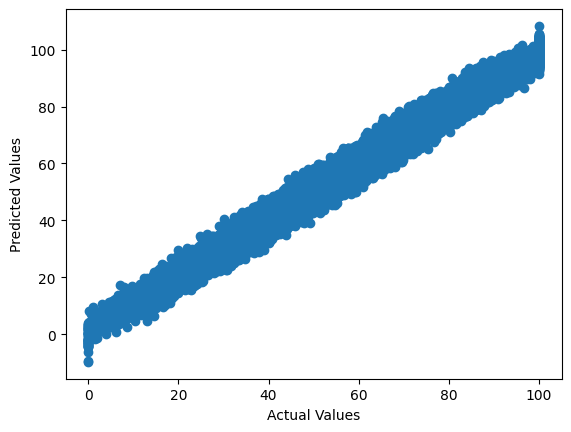

In [189]:
#plotting the predicted values against the actual values or by plotting the residuals.
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [190]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model)
print('-----------------')
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))


LinearRegression()
-----------------
0.9648201940210805
3.5257259742877545
4.310306514628928


In [191]:
dict1={"model":model,"scaler":minmax,"ord1":ordinalExc,"ord2":ordinalsleep,"onehot1":onehot1,"onehot2":onehot2,"label":label}

In [192]:
import pickle
with open("cognitive.pkl","wb") as obj1:
  pickle.dump(dict1,obj1)